## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score

## Loading Data and Data Preprocessing

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\My_Data_Science_Practise\datasets\german_credit_cleaned.csv")
data

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,3,female:divorced_or_married,none,4,real_estate,31,none,own,1,unskilled_resident,1,no,yes,good
996,below_0,30,curr_loans_paid_duly,car_used,3857,below_100,below_4y,4,male:divorced,none,4,life_insurance_or_aggreements,40,none,own,1,management_or_self_emp,1,yes,yes,good
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,4,male:single,none,4,car_or_other,38,none,own,1,skilled_official,1,no,yes,good
998,below_0,45,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,4,male:single,none,4,unknown_or_no_property,23,none,for_free,1,skilled_official,1,yes,yes,bad


In [4]:
data.describe(include='all')

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no_cheking_acc,NaN,curr_loans_paid_duly,radio_tv,NaN,below_100,below_4y,NaN,male:single,none,NaN,car_or_other,NaN,none,own,NaN,skilled_official,NaN,no,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [5]:
data.columns

Index(['checking_acc_status', 'duration', 'cred_hist', 'purpose', 'loan_amt',
       'saving_acc_bonds', 'present_employment_since', 'installment_rate',
       'personal_stat_gender', 'other_debtors_guarantors',
       'present_residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'num_curr_loans', 'job', 'num_people_provide_maint',
       'telephone', 'is_foreign_worker', 'target'],
      dtype='object')

In [6]:
data.dtypes

checking_acc_status         object
duration                     int64
cred_hist                   object
purpose                     object
loan_amt                     int64
saving_acc_bonds            object
present_employment_since    object
installment_rate             int64
personal_stat_gender        object
other_debtors_guarantors    object
present_residence_since      int64
property                    object
age                          int64
other_installment_plans     object
housing                     object
num_curr_loans               int64
job                         object
num_people_provide_maint     int64
telephone                   object
is_foreign_worker           object
target                      object
dtype: object

In [7]:
data.isnull().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [8]:
data['target'].unique()

array(['good', 'bad'], dtype=object)

In [9]:
data['target'].shape

(1000,)

In [10]:
data['target'] = data['target'].map({'good':1,'bad':0})

In [11]:
data.head(5)

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,1
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,0
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,1
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,1
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,0


## Checking Correlation

In [12]:
data.corr()['target']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10256\229557119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['target']


duration                   -0.214927
loan_amt                   -0.154739
installment_rate           -0.072404
present_residence_since    -0.002967
age                         0.091127
num_curr_loans              0.045732
num_people_provide_maint    0.003015
target                      1.000000
Name: target, dtype: float64

In [13]:
avarage_corr = data.corr()['target'].mean()
avarage_corr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10256\3186847989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avarage_corr = data.corr()['target'].mean()


0.08685479364914377

In [14]:
numeric_columns = data.select_dtypes(include='number')
numeric_columns.columns

Index(['duration', 'loan_amt', 'installment_rate', 'present_residence_since',
       'age', 'num_curr_loans', 'num_people_provide_maint', 'target'],
      dtype='object')

In [15]:
dropped_columns = []

for i in data[['duration', 'loan_amt', 'installment_rate', 'present_residence_since',
       'age', 'num_curr_loans', 'num_people_provide_maint', 'target']]:
    
    if abs(data.corr()['target'][i]) < avarage_corr:
        dropped_columns.append(i)
    
data.drop(dropped_columns, axis=1, inplace=True) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10256\1131005026.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data.corr()['target'][i]) < avarage_corr:


In [16]:
data.head(5)

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,age,other_installment_plans,housing,job,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,male:single,none,real_estate,67,none,own,skilled_official,yes,yes,1
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,female:divorced_or_married,none,real_estate,22,none,own,skilled_official,no,yes,0
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,male:single,none,real_estate,49,none,own,unskilled_resident,no,yes,1
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,male:single,guarantor,life_insurance_or_aggreements,45,none,for_free,skilled_official,no,yes,1
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,male:single,none,unknown_or_no_property,53,none,for_free,skilled_official,no,yes,0


In [17]:
numeric_columns = data.select_dtypes(include='number')
numeric_columns.columns

Index(['duration', 'loan_amt', 'age', 'target'], dtype='object')

## Checking Multicollinearity (VIF)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[[
#     'duration', 
    'loan_amt', 
    'age'
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2.126107,loan_amt
1,2.126107,age


In [19]:
data.drop('duration', axis=1, inplace = True)

In [20]:
data

,checking_acc_status,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,age,other_installment_plans,housing,job,telephone,is_foreign_worker,target
0,below_0,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,male:single,none,real_estate,67,none,own,skilled_official,yes,yes,1
1,below_200,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,female:divorced_or_married,none,real_estate,22,none,own,skilled_official,no,yes,0
2,no_cheking_acc,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,male:single,none,real_estate,49,none,own,unskilled_resident,no,yes,1
3,below_0,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,male:single,guarantor,life_insurance_or_aggreements,45,none,for_free,skilled_official,no,yes,1
4,below_0,delay_in_past,car_new,4870,below_100,below_4y,male:single,none,unknown_or_no_property,53,none,for_free,skilled_official,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,female:divorced_or_married,none,real_estate,31,none,own,unskilled_resident,no,yes,1
996,below_0,curr_loans_paid_duly,car_used,3857,below_100,below_4y,male:divorced,none,life_insurance_or_aggreements,40,none,own,management_or_self_emp,yes,yes,1
997,no_cheking_acc,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,male:single,none,car_or_other,38,none,own,skilled_official,no,yes,1
998,below_0,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,male:single,none,unknown_or_no_property,23,none,for_free,skilled_official,yes,yes,0


## Checking Outliers

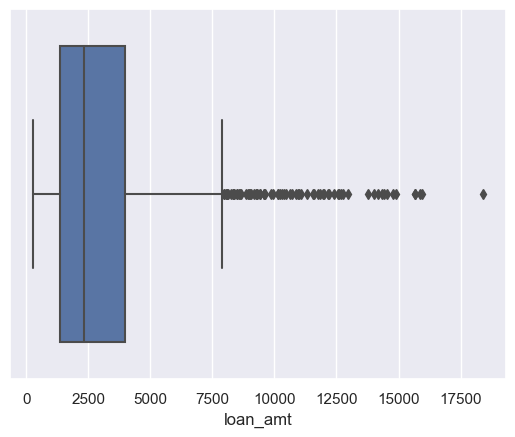

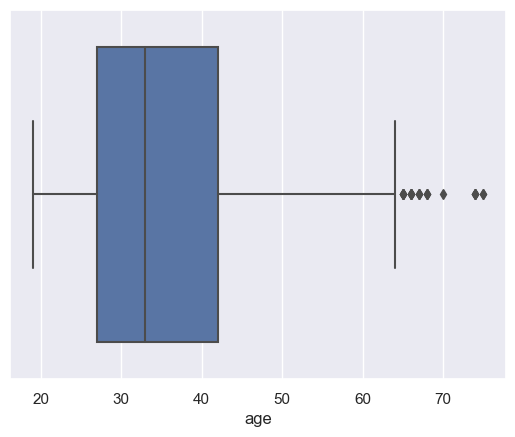

In [21]:
for i in data[['loan_amt', 'age']]:
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

## Outlier rule for capping

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Lower = Q1-1.5*IQR
Upper = Q3+1.5*IQR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10256\529588969.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10256\529588969.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


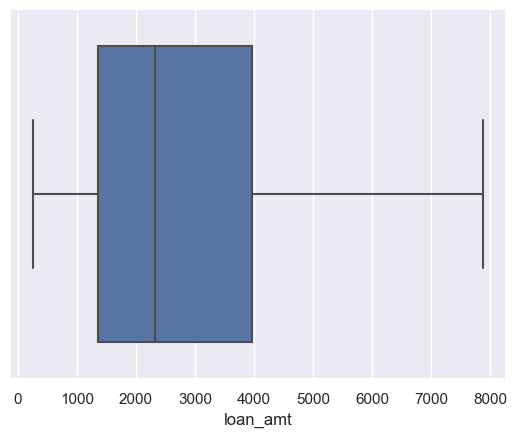

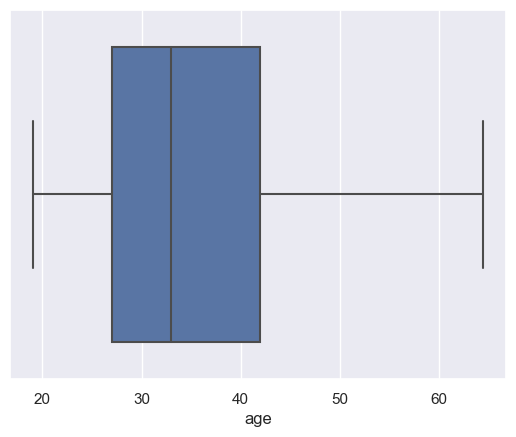

In [23]:
for i in data[['loan_amt', 'age']]:
    
    data[i] = np.where(data[i] > Upper[i], Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i],data[i])
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [24]:
data = data.reset_index(drop=True)

In [25]:
data.head(5)

,checking_acc_status,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,age,other_installment_plans,housing,job,telephone,is_foreign_worker,target
0,below_0,risky_acc_or_curr_loan_other,radio_tv,1169.0,unknown_no_saving_acc,above_7y,male:single,none,real_estate,64.5,none,own,skilled_official,yes,yes,1
1,below_200,curr_loans_paid_duly,radio_tv,5951.0,below_100,below_4y,female:divorced_or_married,none,real_estate,22.0,none,own,skilled_official,no,yes,0
2,no_cheking_acc,risky_acc_or_curr_loan_other,education,2096.0,below_100,below_7y,male:single,none,real_estate,49.0,none,own,unskilled_resident,no,yes,1
3,below_0,curr_loans_paid_duly,furniture_equipment,7882.0,below_100,below_7y,male:single,guarantor,life_insurance_or_aggreements,45.0,none,for_free,skilled_official,no,yes,1
4,below_0,delay_in_past,car_new,4870.0,below_100,below_4y,male:single,none,unknown_or_no_property,53.0,none,for_free,skilled_official,no,yes,0


## WOE Transformation for Logistic Regression

In [26]:
new_data = data.copy()

In [27]:
new_data.head()

,checking_acc_status,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,age,other_installment_plans,housing,job,telephone,is_foreign_worker,target
0,below_0,risky_acc_or_curr_loan_other,radio_tv,1169.0,unknown_no_saving_acc,above_7y,male:single,none,real_estate,64.5,none,own,skilled_official,yes,yes,1
1,below_200,curr_loans_paid_duly,radio_tv,5951.0,below_100,below_4y,female:divorced_or_married,none,real_estate,22.0,none,own,skilled_official,no,yes,0
2,no_cheking_acc,risky_acc_or_curr_loan_other,education,2096.0,below_100,below_7y,male:single,none,real_estate,49.0,none,own,unskilled_resident,no,yes,1
3,below_0,curr_loans_paid_duly,furniture_equipment,7882.0,below_100,below_7y,male:single,guarantor,life_insurance_or_aggreements,45.0,none,for_free,skilled_official,no,yes,1
4,below_0,delay_in_past,car_new,4870.0,below_100,below_4y,male:single,none,unknown_or_no_property,53.0,none,for_free,skilled_official,no,yes,0


In [28]:
for i in new_data.columns[:-1]:
    if (new_data[i].dtype=='int64') | (new_data[i].dtype=='float64'):
        ranges = [-np.inf, new_data[i].quantile(0.25), new_data[i].quantile(0.5), new_data[i].quantile(0.75), np.inf]
        new_data[i+'category'] = pd.cut(new_data[i], bins=ranges)
        
    if new_data[i].dtype=='object':
        grouped = new_data.groupby([i,'target'])['target'].count().unstack().reset_index()
    else:
        grouped = new_data.groupby([i+'category','target'])['target'].count().unstack().reset_index()
    
    grouped['positive_prop'] = grouped[0] / grouped[0].sum()
    grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    grouped.rename(columns={'woe':i+'_woe_quantile'}, inplace=True)
    
    if (new_data[i].dtype=='int64') | (new_data[i].dtype=='float64'):
        new_data = new_data.merge(grouped[[i+'category',i+'_woe_quantile']], how='left', on=i+'category')
        new_data.drop([i+'category',i], axis=1, inplace=True)
    else:
        new_data = new_data.merge(grouped[[i,i+'_woe_quantile']], how='left', on=i)
        new_data.drop(i, axis=1, inplace=True)

In [29]:
new_data

,target,checking_acc_status_woe_quantile,cred_hist_woe_quantile,purpose_woe_quantile,loan_amt_woe_quantile,saving_acc_bonds_woe_quantile,present_employment_since_woe_quantile,personal_stat_gender_woe_quantile,other_debtors_guarantors_woe_quantile,property_woe_quantile,age_woe_quantile,other_installment_plans_woe_quantile,housing_woe_quantile,job_woe_quantile,telephone_woe_quantile,is_foreign_worker_woe_quantile
0,1,0.818099,-0.733741,-0.410063,0.037812,-0.704246,-0.235566,-0.165548,-0.000525,-0.461035,-0.223144,-0.121179,-0.194156,-0.022780,-0.098638,0.034867
1,0,0.401392,0.088319,-0.410063,0.524524,0.271358,0.032103,0.235341,-0.000525,-0.461035,0.305191,-0.121179,-0.194156,-0.022780,0.064691,0.034867
2,1,-1.176263,-0.733741,0.606136,-0.262010,0.271358,-0.394415,-0.165548,-0.000525,-0.461035,-0.223144,-0.121179,-0.194156,-0.097164,0.064691,0.034867
3,1,0.818099,0.088319,0.095557,0.524524,0.271358,-0.394415,-0.165548,-0.587787,0.028573,-0.223144,-0.121179,0.472604,-0.022780,0.064691,0.034867
4,0,0.818099,0.085158,0.359200,0.524524,0.271358,0.032103,-0.165548,-0.000525,0.586082,-0.223144,-0.121179,0.472604,-0.022780,0.064691,0.034867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,-1.176263,0.088319,0.095557,-0.262010,0.271358,-0.394415,0.235341,-0.000525,-0.461035,0.134083,-0.121179,-0.194156,-0.097164,0.064691,0.034867
996,1,0.818099,0.088319,-0.773836,-0.395209,0.271358,0.032103,0.441833,-0.000525,0.028573,-0.322189,-0.121179,-0.194156,0.204413,-0.098638,0.034867
997,1,-1.176263,0.088319,-0.410063,0.037812,0.271358,-0.235566,-0.165548,-0.000525,0.034191,-0.322189,-0.121179,-0.194156,-0.022780,0.064691,0.034867
998,0,0.818099,0.088319,-0.410063,-0.262010,0.271358,0.032103,-0.165548,-0.000525,0.586082,0.305191,-0.121179,0.472604,-0.022780,-0.098638,0.034867


## Splitting Independend and Dependend columns

In [30]:
X = new_data.drop('target', axis=1)
y = new_data['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Function for model evaluation based on metrics

In [32]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test = roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    accuracy_score_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_score_train = metrics.accuracy_score(y_train, y_pred_train)
    
    print('Model Performance:')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Accuracy Score for Test:', accuracy_score_test*100)
    
    print('Accuracy Score for Train:', accuracy_score_train*100)
    
    print('Confusion Matrix:', confusion_matrix)

## Modeling for Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
result_lr = evaluate(lr, X_test, y_test)

Model Performance:
Gini Score for Test: 62.75994710902752
Gini Score for Train: 62.7305725250336
Accuracy Score for Test: 77.0
Accuracy Score for Train: 75.625
Confusion Matrix: [[ 30  29]
 [ 17 124]]


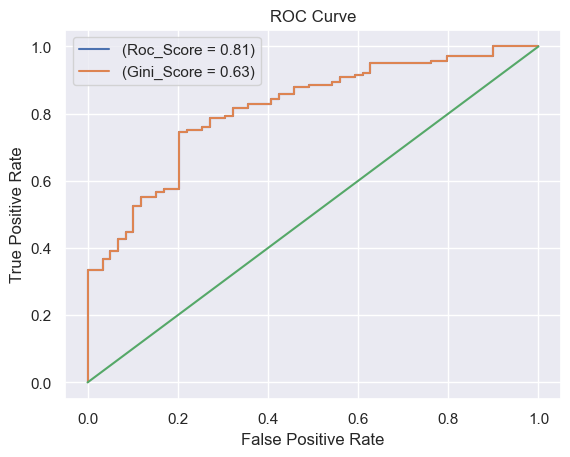

In [37]:
y_prob = lr.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Univariate Analysis

In [38]:
variables= []
train_Gini=[]
test_Gini=[]

for i in X_train.columns:
    X_train_single=X_train[[i]]
    X_test_single=X_test[[i]]
    
    lr.fit(X_train_single, y_train)
    y_prob_train_single=lr.predict_proba(X_train_single)[:, 1]
    
    
    roc_prob_train=roc_auc_score(y_train, y_prob_train_single)
    gini_prob_train=2*roc_prob_train-1
    
    
    lr.fit(X_test_single, y_test)
    y_prob_test_single=lr.predict_proba(X_test_single)[:, 1]
    
    
    roc_prob_test=roc_auc_score(y_test, y_prob_test_single)
    gini_prob_test=2*roc_prob_test-1
    
    
    variables.append(i)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)
    

df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})

df= df.sort_values(by='Test Gini', ascending=False)

df   

,Variable,Train Gini,Test Gini
0,checking_acc_status_woe_quantile,0.394028,0.503306
4,saving_acc_bonds_woe_quantile,0.168425,0.327684
5,present_employment_since_woe_quantile,0.138897,0.252314
1,cred_hist_woe_quantile,0.271951,0.178267
3,loan_amt_woe_quantile,0.197507,0.173699
2,purpose_woe_quantile,0.237539,0.157591
7,other_debtors_guarantors_woe_quantile,0.031770,0.132828
10,other_installment_plans_woe_quantile,0.094189,0.105061
8,property_woe_quantile,0.191094,0.089073
13,telephone_woe_quantile,0.030998,0.073567


## Modeling for other ML algorithms

In [39]:
data.head()

,checking_acc_status,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,age,other_installment_plans,housing,job,telephone,is_foreign_worker,target
0,below_0,risky_acc_or_curr_loan_other,radio_tv,1169.0,unknown_no_saving_acc,above_7y,male:single,none,real_estate,64.5,none,own,skilled_official,yes,yes,1
1,below_200,curr_loans_paid_duly,radio_tv,5951.0,below_100,below_4y,female:divorced_or_married,none,real_estate,22.0,none,own,skilled_official,no,yes,0
2,no_cheking_acc,risky_acc_or_curr_loan_other,education,2096.0,below_100,below_7y,male:single,none,real_estate,49.0,none,own,unskilled_resident,no,yes,1
3,below_0,curr_loans_paid_duly,furniture_equipment,7882.0,below_100,below_7y,male:single,guarantor,life_insurance_or_aggreements,45.0,none,for_free,skilled_official,no,yes,1
4,below_0,delay_in_past,car_new,4870.0,below_100,below_4y,male:single,none,unknown_or_no_property,53.0,none,for_free,skilled_official,no,yes,0


### I will use my first cleaned and preprocessed data for the rest of ML algorithms not WOE-converted data. But, here I will change my data from object to numeric using pd.get_dummies(drop_first=True) and then I will scale it with Standard Scaler.

In [40]:
data_with_dummy = pd.get_dummies(data, drop_first=True)

In [41]:
data_with_dummy

,loan_amt,age,target,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,purpose_car_used,purpose_domestic_applience,purpose_education,purpose_furniture_equipment,purpose_others,purpose_radio_tv,purpose_repairs,purpose_retraining,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_below_500,saving_acc_bonds_unknown_no_saving_acc,present_employment_since_below_1y,present_employment_since_below_4y,present_employment_since_below_7y,present_employment_since_unemployed,personal_stat_gender_male:divorced,personal_stat_gender_male:married_or_widowed,personal_stat_gender_male:single,other_debtors_guarantors_guarantor,other_debtors_guarantors_none,property_life_insurance_or_aggreements,property_real_estate,property_unknown_or_no_property,other_installment_plans_none,other_installment_plans_store,housing_own,housing_rent,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,telephone_yes,is_foreign_worker_yes
0,1169.0,64.5,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,5951.0,22.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
2,2096.0,49.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1
3,7882.0,45.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
4,4870.0,53.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1736.0,31.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
996,3857.0,40.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1
997,804.0,38.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
998,1845.0,23.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,1


In [42]:
target = data_with_dummy.drop('target', axis=1)
scaled = StandardScaler().fit_transform(target)

In [43]:
scaled = pd.DataFrame(scaled, columns=target.columns)

In [44]:
scaled

,loan_amt,age,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,purpose_car_used,purpose_domestic_applience,purpose_education,purpose_furniture_equipment,purpose_others,purpose_radio_tv,purpose_repairs,purpose_retraining,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_below_500,saving_acc_bonds_unknown_no_saving_acc,present_employment_since_below_1y,present_employment_since_below_4y,present_employment_since_below_7y,present_employment_since_unemployed,personal_stat_gender_male:divorced,personal_stat_gender_male:married_or_widowed,personal_stat_gender_male:single,other_debtors_guarantors_guarantor,other_debtors_guarantors_none,property_life_insurance_or_aggreements,property_real_estate,property_unknown_or_no_property,other_installment_plans_none,other_installment_plans_store,housing_own,housing_rent,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,telephone_yes,is_foreign_worker_yes
0,-0.860961,2.616620,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,1.553374,-0.552705,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,1.603567,-0.149983,-0.095298,-1.232433,-0.259299,-0.338862,2.112932,-0.455773,-0.716142,-0.45897,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,1.214598,0.196014
1,1.326550,-1.211943,-0.614337,1.648476,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,1.603567,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,1.396371,-0.45897,-0.257095,-0.229416,-0.318311,-1.101086,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
2,-0.436908,1.220321,-0.614337,-0.606621,1.240190,-0.31063,-0.204124,-0.226991,1.553374,-0.552705,-0.338862,-0.110208,4.358899,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014
3,2.209879,0.859985,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,2.127172,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,0.908195,4.269750,-3.122929,1.819435,-0.626704,-0.426653,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
4,0.832050,1.580656,1.627770,-0.606621,-0.806328,3.21926,-0.204124,-0.226991,-0.643760,1.809283,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,1.396371,-0.45897,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,-0.626704,2.343823,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.601589,-0.401188,-0.614337,-0.606621,1.240190,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,2.127172,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,-1.101086,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014
996,0.368656,0.409566,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,2.951057,-0.110208,-0.229416,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.47

In [45]:
scaled['target']= data['target']

In [46]:
scaled

,loan_amt,age,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,purpose_car_used,purpose_domestic_applience,purpose_education,purpose_furniture_equipment,purpose_others,purpose_radio_tv,purpose_repairs,purpose_retraining,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_below_500,saving_acc_bonds_unknown_no_saving_acc,present_employment_since_below_1y,present_employment_since_below_4y,present_employment_since_below_7y,present_employment_since_unemployed,personal_stat_gender_male:divorced,personal_stat_gender_male:married_or_widowed,personal_stat_gender_male:single,other_debtors_guarantors_guarantor,other_debtors_guarantors_none,property_life_insurance_or_aggreements,property_real_estate,property_unknown_or_no_property,other_installment_plans_none,other_installment_plans_store,housing_own,housing_rent,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,telephone_yes,is_foreign_worker_yes,target
0,-0.860961,2.616620,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,1.553374,-0.552705,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,1.603567,-0.149983,-0.095298,-1.232433,-0.259299,-0.338862,2.112932,-0.455773,-0.716142,-0.45897,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,1.214598,0.196014,1
1,1.326550,-1.211943,-0.614337,1.648476,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,1.603567,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,1.396371,-0.45897,-0.257095,-0.229416,-0.318311,-1.101086,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014,0
2,-0.436908,1.220321,-0.614337,-0.606621,1.240190,-0.31063,-0.204124,-0.226991,1.553374,-0.552705,-0.338862,-0.110208,4.358899,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014,1
3,2.209879,0.859985,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,2.127172,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,0.908195,4.269750,-3.122929,1.819435,-0.626704,-0.426653,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014,1
4,0.832050,1.580656,1.627770,-0.606621,-0.806328,3.21926,-0.204124,-0.226991,-0.643760,1.809283,-0.338862,-0.110208,-0.229416,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,1.396371,-0.45897,-0.257095,-0.229416,-0.318311,0.908195,-0.234206,0.320212,-0.549621,-0.626704,2.343823,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.601589,-0.401188,-0.614337,-0.606621,1.240190,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,-0.338862,-0.110208,-0.229416,2.127172,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0.259299,-0.338862,-0.473276,-0.455773,-0.716142,2.17879,-0.257095,-0.229416,-0.318311,-1.101086,-0.234206,0.320212,-0.549621,1.595650,-0.426653,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014,1
996,0.368656,0.409566,1.627770,-0.606621,-0.806328,-0.31063,-0.204124,-0.226991,-0.643760,-0.552705,2.951057,-0.110208,-0.229416,-0.470108,-0.110208,-0.623610,-0.149983,-0.095298,0.811403,-0

In [47]:
X = scaled.drop('target', axis=1)
y = scaled['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test = roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    accuracy_score_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_score_train = metrics.accuracy_score(y_train, y_pred_train)
    
    print('Model Performance:')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Accuracy Score for Test:', accuracy_score_test*100)
    
    print('Accuracy Score for Train:', accuracy_score_train*100)
    
    print('Confusion Matrix:', confusion_matrix)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier()

In [52]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
result_dtc = evaluate(dtc, X_test, y_test)

Model Performance:
Gini Score for Test: 19.245101574708514
Gini Score for Train: 100.0
Accuracy Score for Test: 66.0
Accuracy Score for Train: 100.0
Confusion Matrix: [[ 26  33]
 [ 35 106]]


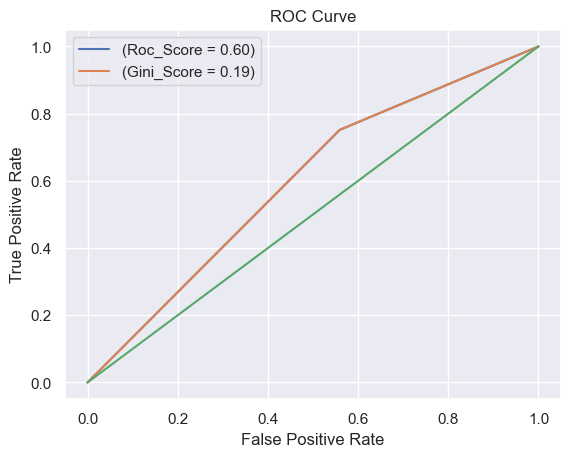

In [54]:
y_prob = dtc.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

### Decision Tree Classification model I used above overfitted since the results show it gave high accuracy and gini score in train data but, did not generalize in unseen (test) data. So, it did not learn well and just memorized patterns. 
### Decision trees are capable of learning intricate details of the training data, including noise and outliers. This high flexibility makes them prone to capturing noise rather than the underlying patterns. As a result, the tree may perform exceptionally well on the training data but fail to generalize to new, unseen data.

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
result_rfc = evaluate(rfc, X_test, y_test)

Model Performance:
Gini Score for Test: 56.91789878591176
Gini Score for Train: 100.0
Accuracy Score for Test: 73.5
Accuracy Score for Train: 100.0
Confusion Matrix: [[ 21  38]
 [ 15 126]]


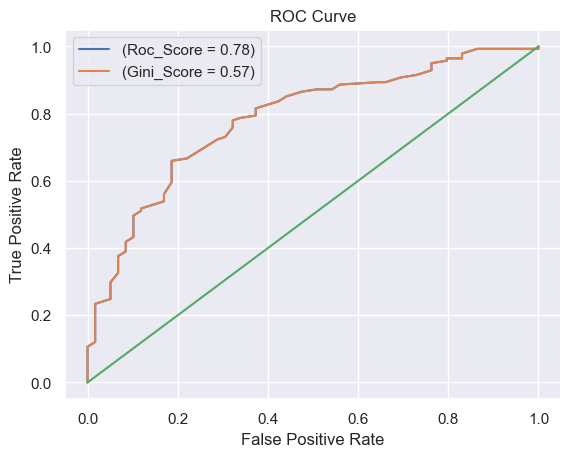

In [59]:
y_prob = rfc.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Applying SelectFromModel

In [60]:
from sklearn.feature_selection import SelectFromModel

In [61]:
sfm = SelectFromModel(rfc)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [62]:
selected_feature = X.columns[(sfm.get_support())]
selected_feature

Index(['loan_amt', 'age', 'checking_acc_status_below_0',
       'checking_acc_status_no_cheking_acc',
       'cred_hist_risky_acc_or_curr_loan_other', 'purpose_car_new',
       'saving_acc_bonds_below_100', 'personal_stat_gender_male:single',
       'other_installment_plans_none', 'housing_own', 'job_skilled_official',
       'telephone_yes'],
      dtype='object')

In [63]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

loan_amt                                        0.144617
age                                             0.127290
checking_acc_status_no_cheking_acc              0.049479
checking_acc_status_below_0                     0.041320
cred_hist_risky_acc_or_curr_loan_other          0.032900
purpose_car_new                                 0.027223
telephone_yes                                   0.027079
other_installment_plans_none                    0.027077
saving_acc_bonds_below_100                      0.026045
personal_stat_gender_male:single                0.025703
present_employment_since_below_4y               0.025113
checking_acc_status_below_200                   0.023546
job_skilled_official                            0.023278
property_real_estate                            0.023061
housing_own                                     0.022752
property_unknown_or_no_property                 0.020838
property_life_insurance_or_aggreements          0.020117
purpose_radio_tv               

In [64]:
X_train=X_train[['loan_amt', 'age', 'checking_acc_status_below_0',
       'checking_acc_status_no_cheking_acc',
       'cred_hist_risky_acc_or_curr_loan_other', 'purpose_car_new',
       'saving_acc_bonds_below_100', 'present_employment_since_below_4y',
       'personal_stat_gender_male:single', 'property_real_estate',
       'other_installment_plans_none', 'telephone_yes']]
X_test=X_test[['loan_amt', 'age', 'checking_acc_status_below_0',
       'checking_acc_status_no_cheking_acc',
       'cred_hist_risky_acc_or_curr_loan_other', 'purpose_car_new',
       'saving_acc_bonds_below_100', 'present_employment_since_below_4y',
       'personal_stat_gender_male:single', 'property_real_estate',
       'other_installment_plans_none', 'telephone_yes']]

In [65]:
X_train.head()

,loan_amt,age,checking_acc_status_below_0,checking_acc_status_no_cheking_acc,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,saving_acc_bonds_below_100,present_employment_since_below_4y,personal_stat_gender_male:single,property_real_estate,other_installment_plans_none,telephone_yes
29,1.731390,2.481495,1.627770,-0.806328,-0.643760,-0.552705,0.811403,-0.716142,0.908195,-0.626704,0.478018,1.214598
535,-0.334897,-0.221021,-0.614337,-0.806328,1.553374,-0.552705,0.811403,-0.716142,-1.101086,-0.626704,0.478018,-0.823318
695,-0.830312,1.310405,-0.614337,1.240190,-0.643760,-0.552705,-1.232433,1.396371,0.908195,-0.626704,0.478018,-0.823318
557,0.892890,-0.581356,-0.614337,1.240190,-0.643760,1.809283,-1.232433,1.396371,-1.101086,-0.626704,-2.091971,1.214598
836,-0.990419,-1.302027,-0.614337,1.240190,-0.643760,-0.552705,-1.232433,1.396371,-1.101086,-0.626704,0.478018,-0.823318


In [66]:
X_test.head()

,loan_amt,age,checking_acc_status_below_0,checking_acc_status_no_cheking_acc,cred_hist_risky_acc_or_curr_loan_other,purpose_car_new,saving_acc_bonds_below_100,present_employment_since_below_4y,personal_stat_gender_male:single,property_real_estate,other_installment_plans_none,telephone_yes
521,0.063539,-1.031775,1.627770,-0.806328,-0.643760,-0.552705,0.811403,1.396371,-1.101086,1.595650,0.478018,-0.823318
737,0.607901,-0.040853,1.627770,-0.806328,-0.643760,1.809283,-1.232433,1.396371,0.908195,-0.626704,0.478018,1.214598
740,-0.332153,-0.311105,1.627770,-0.806328,-0.643760,1.809283,-1.232433,-0.716142,0.908195,-0.626704,-2.091971,-0.823318
660,-0.802408,-1.121859,-0.614337,-0.806328,-0.643760,-0.552705,0.811403,1.396371,-1.101086,1.595650,0.478018,-0.823318
411,1.922145,-0.040853,-0.614337,1.240190,1.553374,-0.552705,0.811403,-0.716142,0.908195,-0.626704,0.478018,1.214598


In [67]:
rfc_importance = RandomForestClassifier()
rfc_importance.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
result_rfc_importance = evaluate(rfc_importance, X_test, y_test)

Model Performance:
Gini Score for Test: 50.42673398244981
Gini Score for Train: 100.0
Accuracy Score for Test: 75.0
Accuracy Score for Train: 100.0
Confusion Matrix: [[ 27  32]
 [ 18 123]]


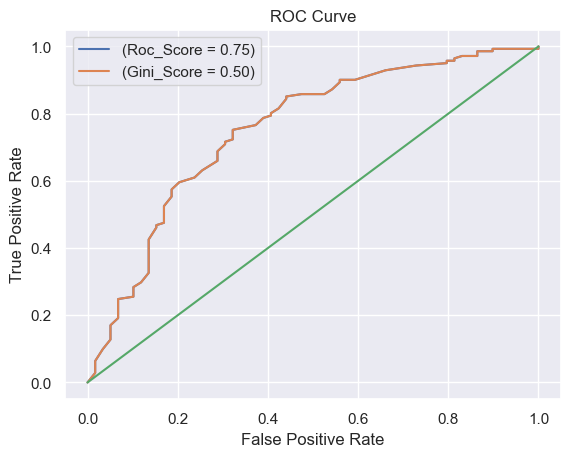

In [69]:
y_prob = rfc_importance.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Hyperparameter-Tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [71]:
rfc_randomized = RandomizedSearchCV(estimator = rfc_importance, param_distributions = random_grid, 
                                    n_iter = 10, 
                                    cv = 5, 
                                    verbose=1, 
                                    random_state=42, 
                                    n_jobs = -1)

rfc_randomized.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [72]:
result_rfc_randomized = evaluate(rfc_randomized, X_test, y_test)

Model Performance:
Gini Score for Test: 55.98028609207839
Gini Score for Train: 96.64189906397762
Accuracy Score for Test: 73.5
Accuracy Score for Train: 91.625
Confusion Matrix: [[ 17  42]
 [ 11 130]]


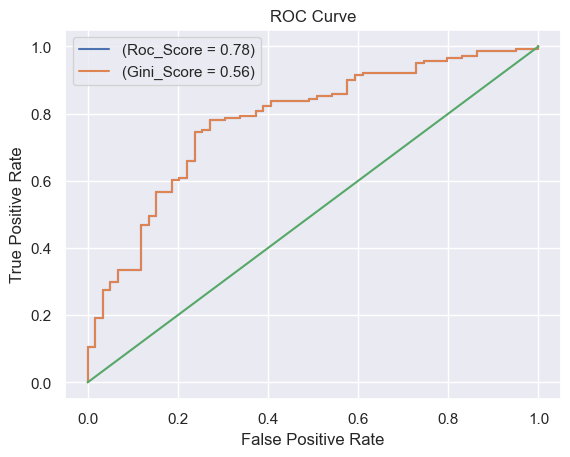

In [73]:
y_prob = rfc_randomized.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [74]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingCVClassifier

In [75]:
xgboost_base = XGBClassifier()

In [76]:
xgboost_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
result_xgboost_base = evaluate(xgboost_base, X_test, y_test)

Model Performance:
Gini Score for Test: 44.632768361581924
Gini Score for Train: 100.0
Accuracy Score for Test: 71.5
Accuracy Score for Train: 100.0
Confusion Matrix: [[ 22  37]
 [ 20 121]]


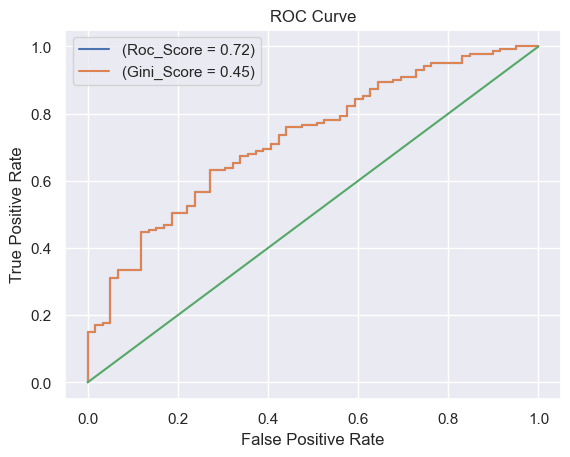

In [78]:
y_prob = xgboost_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [79]:
catboost_base = CatBoostClassifier()

In [80]:
catboost_base.fit(X_train, y_train)

Learning rate set to 0.009366
0:	learn: 0.6899160	total: 132ms	remaining: 2m 12s
1:	learn: 0.6861809	total: 140ms	remaining: 1m 9s
2:	learn: 0.6821848	total: 147ms	remaining: 49s
3:	learn: 0.6790411	total: 154ms	remaining: 38.4s
4:	learn: 0.6752475	total: 161ms	remaining: 32.1s
5:	learn: 0.6729272	total: 168ms	remaining: 27.9s
6:	learn: 0.6693549	total: 175ms	remaining: 24.8s
7:	learn: 0.6656996	total: 182ms	remaining: 22.6s
8:	learn: 0.6623244	total: 189ms	remaining: 20.9s
9:	learn: 0.6590803	total: 196ms	remaining: 19.4s
10:	learn: 0.6564600	total: 204ms	remaining: 18.3s
11:	learn: 0.6525008	total: 210ms	remaining: 17.3s
12:	learn: 0.6491132	total: 216ms	remaining: 16.4s
13:	learn: 0.6470357	total: 220ms	remaining: 15.5s
14:	learn: 0.6433211	total: 226ms	remaining: 14.8s
15:	learn: 0.6413783	total: 231ms	remaining: 14.2s
16:	learn: 0.6376693	total: 238ms	remaining: 13.8s
17:	learn: 0.6344313	total: 245ms	remaining: 13.3s
18:	learn: 0.6317878	total: 251ms	remaining: 13s
19:	learn: 0.6

In [81]:
result_catboost_base = evaluate(catboost_base, X_test, y_test)

Model Performance:
Gini Score for Test: 54.85034258925352
Gini Score for Train: 96.53946362428462
Accuracy Score for Test: 73.5
Accuracy Score for Train: 93.0
Confusion Matrix: [[ 18  41]
 [ 12 129]]


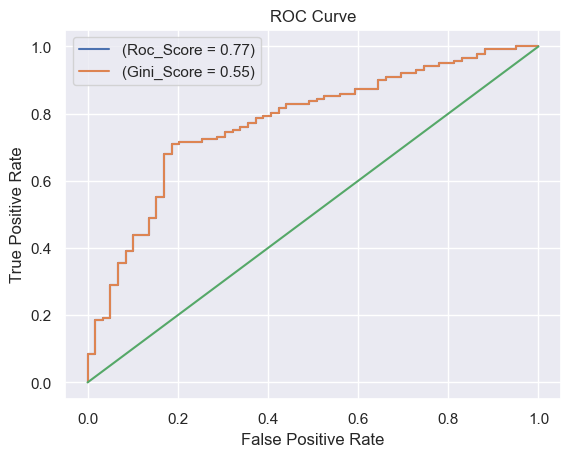

In [82]:
y_prob = catboost_base.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [83]:
#Hyperparameter Tuning (XGBoost)

param_distributions = {
    
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6),
    'colsample_bytree': np.linspace(0.5, 1, num=6),
    'gamma': [0,1,5,10]
    
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5, 10]}

In [84]:
xgboost_randomized = RandomizedSearchCV(xgboost_base, 
                                        param_distributions=param_distributions, 
                                        n_iter=10, cv=5, 
                                        n_jobs=-1, 
                                        random_state=42)
xgboost_randomized.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5, 10],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [85]:
optimized_xgboost=xgboost_randomized.best_estimator_

In [86]:
result_optimized_xgboost=evaluate(optimized_xgboost, X_test, y_test)

Model Performance:
Gini Score for Test: 59.11768241375166
Gini Score for Train: 61.549595825384706
Accuracy Score for Test: 71.5
Accuracy Score for Train: 76.25
Confusion Matrix: [[ 12  47]
 [ 10 131]]


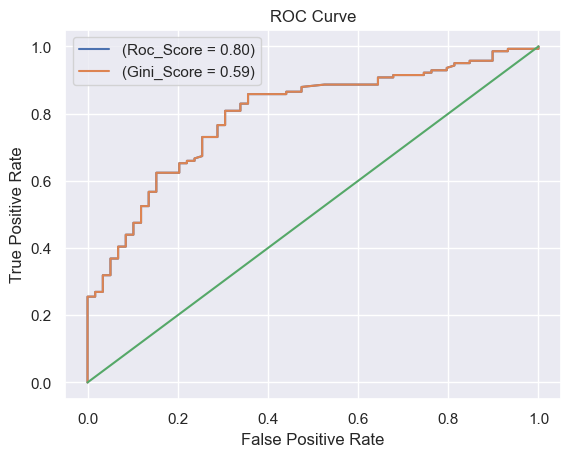

In [87]:
y_prob = optimized_xgboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [88]:
#Hyperparameter Tuning (CatBoost)

param_distributions = {
    
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)
    
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [89]:
catboost_randomized=RandomizedSearchCV(catboost_base, 
                                       param_distributions=param_distributions, 
                                       cv=5, n_iter=10, 
                                       random_state=42)

catboost_randomized.fit(X_train, y_train)

0:	learn: 0.6850837	total: 2.38ms	remaining: 116ms
1:	learn: 0.6766431	total: 5.62ms	remaining: 135ms
2:	learn: 0.6679508	total: 7.54ms	remaining: 118ms
3:	learn: 0.6598018	total: 10ms	remaining: 115ms
4:	learn: 0.6542117	total: 12.5ms	remaining: 113ms
5:	learn: 0.6494355	total: 15.1ms	remaining: 111ms
6:	learn: 0.6445261	total: 17.7ms	remaining: 109ms
7:	learn: 0.6413314	total: 20.8ms	remaining: 109ms
8:	learn: 0.6318512	total: 24.3ms	remaining: 111ms
9:	learn: 0.6284492	total: 28ms	remaining: 112ms
10:	learn: 0.6244705	total: 31.4ms	remaining: 111ms
11:	learn: 0.6184194	total: 34.7ms	remaining: 110ms
12:	learn: 0.6122593	total: 37.3ms	remaining: 106ms
13:	learn: 0.6099049	total: 40ms	remaining: 103ms
14:	learn: 0.6055460	total: 42.8ms	remaining: 99.9ms
15:	learn: 0.6016122	total: 46.2ms	remaining: 98.2ms
16:	learn: 0.5982882	total: 49.2ms	remaining: 95.5ms
17:	learn: 0.5941004	total: 51.8ms	remaining: 92.1ms
18:	learn: 0.5903950	total: 54.3ms	remaining: 88.6ms
19:	learn: 0.5888425	to

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001B9DD405390>,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [90]:
optimized_catboost=catboost_randomized.best_estimator_

In [91]:
result_optimized_catboost=evaluate(optimized_catboost, X_test, y_test)

Model Performance:
Gini Score for Test: 58.79312417357856
Gini Score for Train: 64.71470245473911
Accuracy Score for Test: 74.5
Accuracy Score for Train: 77.5
Confusion Matrix: [[ 15  44]
 [  7 134]]


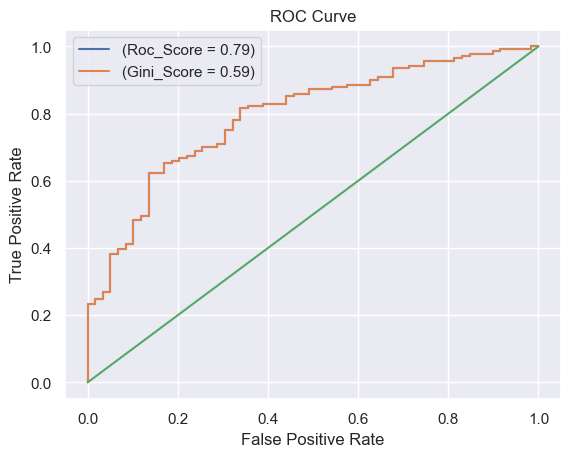

In [92]:
y_prob = optimized_catboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [93]:
#Stacking Model

base_classifiers = [
    catboost_base,
    optimized_xgboost,
    rfc
]

In [94]:
meta_classifier = optimized_catboost

In [95]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [96]:
stacking_classifier.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: catboostclassifier (1/3)
Learning rate set to 0.008515
0:	learn: 0.6904991	total: 5.77ms	remaining: 5.76s
1:	learn: 0.6867264	total: 11.3ms	remaining: 5.66s
2:	learn: 0.6823739	total: 18.2ms	remaining: 6.04s
3:	learn: 0.6789556	total: 25.5ms	remaining: 6.34s
4:	learn: 0.6756533	total: 30.5ms	remaining: 6.06s
5:	learn: 0.6726807	total: 36.4ms	remaining: 6.03s
6:	learn: 0.6688150	total: 43.1ms	remaining: 6.11s
7:	learn: 0.6654029	total: 49.6ms	remaining: 6.15s
8:	learn: 0.6621453	total: 56.9ms	remaining: 6.26s
9:	learn: 0.6583782	total: 62.9ms	remaining: 6.22s
10:	learn: 0.6548737	total: 69.8ms	remaining: 6.28s
11:	learn: 0.6517725	total: 76.3ms	remaining: 6.28s
12:	learn: 0.6489055	total: 82.9ms	remaining: 6.3s
13:	learn: 0.6458963	total: 89ms	remaining: 6.27s
14:	learn: 0.6427787	total: 95ms	remaining: 6.24s
15:	learn: 0.6399271	total: 102ms	remaining: 6.25s
16:	learn: 0.6366231	total: 108ms	remaining: 6.24s
17:	learn: 0.6351787	total: 111m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


26:	learn: 0.6124532	total: 167ms	remaining: 6.03s
27:	learn: 0.6101828	total: 173ms	remaining: 6.02s
28:	learn: 0.6078312	total: 179ms	remaining: 5.99s
29:	learn: 0.6054531	total: 185ms	remaining: 5.97s
30:	learn: 0.6028481	total: 191ms	remaining: 5.97s
31:	learn: 0.6003744	total: 198ms	remaining: 6s
32:	learn: 0.5983840	total: 205ms	remaining: 6s
33:	learn: 0.5959171	total: 212ms	remaining: 6.01s
34:	learn: 0.5944160	total: 218ms	remaining: 6.02s
35:	learn: 0.5923367	total: 225ms	remaining: 6.02s
36:	learn: 0.5900716	total: 232ms	remaining: 6.05s
37:	learn: 0.5879210	total: 239ms	remaining: 6.04s
38:	learn: 0.5855881	total: 246ms	remaining: 6.05s
39:	learn: 0.5831526	total: 252ms	remaining: 6.05s
40:	learn: 0.5810365	total: 259ms	remaining: 6.06s
41:	learn: 0.5796888	total: 263ms	remaining: 5.99s
42:	learn: 0.5776814	total: 269ms	remaining: 5.98s
43:	learn: 0.5763120	total: 275ms	remaining: 5.97s
44:	learn: 0.5740376	total: 282ms	remaining: 5.97s
45:	learn: 0.5712201	total: 288ms	rem

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: randomforestclassifier (3/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


Learning rate set to 0.009366
0:	learn: 0.6899160	total: 5.91ms	remaining: 5.9s
1:	learn: 0.6861809	total: 13.2ms	remaining: 6.6s
2:	learn: 0.6821848	total: 20.9ms	remaining: 6.94s
3:	learn: 0.6790411	total: 27.8ms	remaining: 6.93s
4:	learn: 0.6752475	total: 33.7ms	remaining: 6.7s
5:	learn: 0.6729272	total: 38.9ms	remaining: 6.45s
6:	learn: 0.6693549	total: 44.2ms	remaining: 6.28s
7:	learn: 0.6656996	total: 49.7ms	remaining: 6.16s
8:	learn: 0.6623244	total: 55.7ms	remaining: 6.13s
9:	learn: 0.6590803	total: 61.6ms	remaining: 6.1s
10:	learn: 0.6564600	total: 67.8ms	remaining: 6.09s
11:	learn: 0.6525008	total: 73.3ms	remaining: 6.03s
12:	learn: 0.6491132	total: 79.4ms	remaining: 6.02s
13:	learn: 0.6470357	total: 82.7ms	remaining: 5.82s
14:	learn: 0.6433211	total: 88.7ms	remaining: 5.83s
15:	learn: 0.6413783	total: 92.9ms	remaining: 5.71s
16:	learn: 0.6376693	total: 98.6ms	remaining: 5.7s
17:	learn: 0.6344313	total: 105ms	remaining: 5.72s
18:	learn: 0.6317878	total: 111ms	remaining: 5.72s

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x000001B9DD405390>,
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.5,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=5,
                                                grow_policy=None,
                                                import...
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=500, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                                  RandomForestClassifier()],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x000001B9DADD7050>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [97]:
result_stacking_classifier = evaluate(stacking_classifier, X_test, y_test)

Model Performance:
Gini Score for Test: 55.475417718475775
Gini Score for Train: 70.89942769765214
Accuracy Score for Test: 72.5
Accuracy Score for Train: 78.375
Confusion Matrix: [[ 13  46]
 [  9 132]]


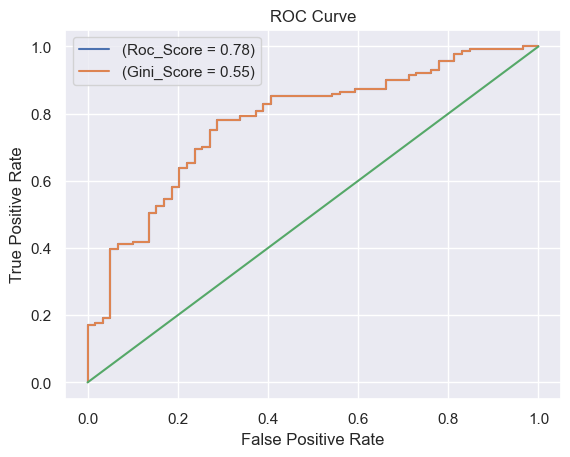

In [98]:
y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

## Conclusion

### I applied so many different machine learning algorithms including xgboost, catboost, stacking etc. to dataset, and then optimized them as well. However Logistic Regression with WOE values remained the most accurrate model with high (over 62) gini score. That's why I checked above Univariate Analysis for Logistic Regression model.